# CHAPTER 11 DATA ALGORITHM

Sentiment Analysis:
This is a sentiment analysis on social media for 100 tweets on news medial selected:
BBC,CNN,CBS,FoxNew and New York Times.The data collected were analyzed below:

In [86]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


In [87]:
#!pip install vaderSentiment
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [88]:
# Twitter API Keys
access_token = "966112597975150592-I6l9SD8IOj3OYmQBkOnNeRLr3lyqsrN"
access_token_secret = "HR3Eiyfh3kG16zTraLdXCtcNLMhXOdU23UH8cYfNkzRBV"
consumer_key = "rjQVbO0NyrvcuJDT91752ex11"
consumer_secret = "zufLHHrPOWN1sF8JocuB36wj4yZWscIwUGwQYkh8TYfCG9aRIG"


In [89]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target Search Term of the various Media channels
Media_users = ("@CBS", "@CTVNews", "@CNN","@FoxNews", "@nytimes")

# Array to hold sentiment
Sentiment_array = []

# Extracting the first 100 tweets in each Media Channel
print("Beginning of extraction of the posted tweets from the media channels")

for user in Media_users:
    # Setting the tweet count as 100
    tweetcount=100
    print("Start tweets from %s"%user)
    
    # Extracting 5 pages of tweets
    for x in range(5):
        public_tweets=api.user_timeline(user,page=x)
        # For each tweet 
        for tweet in public_tweets:
            #Calculating the compound,positive,negative and neutral value for each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            # Store Tweet in Array
            Sentiment_array.append({"Media":user,
                                    "Tweet Text":tweet["text"],
                                    "Compound":compound,
                                    "Positive":pos,
                                    "Negative":neg,
                                    "Neutral":neu,
                                    "Date":tweet["created_at"],
                                    "Tweets Ago":tweetcount})
            #Decreasing tweet count by 1
            tweetcount-=1

print("Stop Extraction of Tweets")


Beginning of extraction of the posted tweets from the media channels
Start tweets from @CBS
Start tweets from @CTVNews
Start tweets from @CNN
Start tweets from @FoxNews
Start tweets from @nytimes
Stop Extraction of Tweets


In [90]:
# Creating a dataframe from the Sentiment Array
Sentiment_DF=pd.DataFrame.from_dict(Sentiment_array)
# Removing the '@' from Media column in the data frame
Sentiment_DF['Media'] = Sentiment_DF['Media'].map(lambda x: x.lstrip('@'))

# Re_arranging the order of columns before saving into CSV file
Sentiment_DF=Sentiment_DF[["Media","Date","Tweet Text","Compound","Positive","Negative","Neutral","Tweets Ago"]]
# Storing into a CSV File\
Sentiment_DF.to_csv("Output/Media_SentimentAnalysis.csv")

Sentiment_DF.head(10)




,Media,Date,Tweet Text,Compound,Positive,Negative,Neutral,Tweets Ago
0,CBS,Tue May 12 00:31:18 +0000 2020,As we continue to experience these unprecedent...,0.0000,0.000,0.0,1.000,100
1,CBS,Mon May 11 23:00:00 +0000 2020,"Good evening. Your mission, should you choose ...",0.6705,0.244,0.0,0.756,99
2,CBS,Mon May 11 21:15:00 +0000 2020,"We see you, America, and you've been making us...",0.8316,0.342,0.0,0.658,98
3,CBS,Mon May 11 20:25:41 +0000 2020,RT @CBSAllAccess: Escape 🌀 Stream all episodes...,0.1779,0.075,0.0,0.925,97
4,CBS,Mon May 11 19:58:45 +0000 2020,Here's how the cast of @TheUnicornCBS is stayi...,0.4404,0.132,0.0,0.868,96
5,CBS,Mon May 11 15:14:08 +0000 2020,From The Ed Sullivan Show to The King of Queen...,0.4019,0.109,0.0,0.891,95
6,CBS,Mon May 11 14:14:30 +0000 2020,RT @PriceIsRight: .@RuPaul is on the #PriceIsR...,0.8832,0.364,0.0,0.636,94
7,CBS,Mon May 11 03:00:00 +0000 2020,"Thanks for joining us! Tune in on Sunday, May ...",0.4926,0.151,0.0,0.849,93
8,CBS,Mon May 11 02:42:28 +0000 2020,"Oh, hey, @HaleyJoelOsment! We see Gump People....",0.0000,0.000,0.0,1.000,92
9,CBS,Mon May 11 02:38:59 +0000 2020,Forrest's #QuarantineBeard game is strong. #CB...,0.5106,0.355,0.0,0.645,91


In [91]:
# Creating an array with the unique Media sources in the data frame
Media_Source=Sentiment_DF["Media"].unique()
Media_Source

array(['CBS', 'CTVNews', 'CNN', 'FoxNews', 'nytimes'], dtype=object)

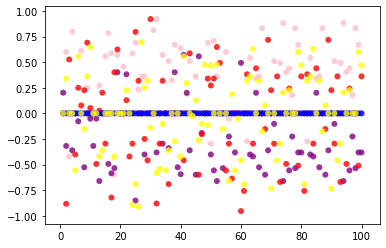

In [92]:
#Plotting the graph for each media source
for media in Media_Source:
    # Creating a temporary data frame to store for only one media channel at a time
    Temp_DF=Sentiment_DF[Sentiment_DF["Media"]==media]
    plt.scatter(Temp_DF["Tweets Ago"],Temp_DF["Compound"], marker="o", linewidth=0, alpha=0.8, label=media,
                facecolors=Temp_DF.Media.map({"CBS": "pink", "CTVNews" : "purple",  "CNN": 'red',
                                              "FoxNews":"blue","nytimes":"yellow"}))

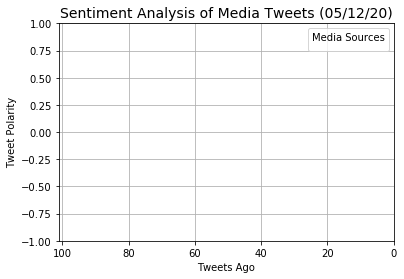

In [93]:
#plt.hlines(0,0,np.arange(len(Sentiment_DF["Compound"])),alpha=1)
# Setting the legend 
plt.legend(bbox_to_anchor = (1,1),title="Media Sources")
# Setting the title,x_axis and y_axis labels
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")), fontsize=14)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Setting the x_axis and y_axis limits
plt.xlim(101,0)
plt.ylim(-1,1)
# Setting the grid
plt.grid(True)

# Saving the figue
plt.savefig("Output/Sentiment Analysis of Media Tweets.png",bbox_inches='tight')

plt.show()

In [94]:
# Calculating the mean for each Media channel and storing to a dataframe
Media_Compound_Means=Sentiment_DF.groupby("Media").mean()["Compound"].to_frame()
#Resetting the index 
Media_Compound_Means.reset_index(inplace=True)

Media_Compound_Means


,Media,Compound
0,CBS,0.266178
1,CNN,-0.025485
2,CTVNews,-0.179904
3,FoxNews,0.000000
4,nytimes,-0.020984
